### Module 7: Demo7 :  Validate NN

In [1]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, )); x = torch.from_numpy(x) ; return x
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500);self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125); self.fc4 = nn.Linear(125, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x));  x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x));  x = self.fc4(x)
        return x
# build model
model = DNN().to(device)
# define cost
criterion = nn.CrossEntropyLoss()
# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))
losses = []
acces = []
eval_losses = []
eval_acces = []
for epoch in range(5):
    train_loss = 0
    train_acc = 0
    model.train()      
    for im, label in train_data:
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        loss = criterion(pred, label)
        # zero the parameter gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #==============================================
        train_loss += loss.item()
        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        #=============================================
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    #======================================
    eval_loss = 0
    eval_acc = 0
    model.eval()
    for im, label in test_data:
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        loss = criterion(pred, label)
        #===============================
        eval_loss += loss.item()
        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_data), train_acc / len(train_data), eval_loss / len(test_data), eval_acc / len(test_data)))

Using cpu device
epoch: 0, Train Loss: 0.599280, Train Acc: 0.810618, Eval Loss: 0.227093, Eval Acc: 0.928600
epoch: 1, Train Loss: 0.156560, Train Acc: 0.953641, Eval Loss: 0.129241, Eval Acc: 0.958366
epoch: 2, Train Loss: 0.099217, Train Acc: 0.969816, Eval Loss: 0.097910, Eval Acc: 0.970530
epoch: 3, Train Loss: 0.072637, Train Acc: 0.978278, Eval Loss: 0.079742, Eval Acc: 0.975771
epoch: 4, Train Loss: 0.053520, Train Acc: 0.983459, Eval Loss: 0.068315, Eval Acc: 0.979925


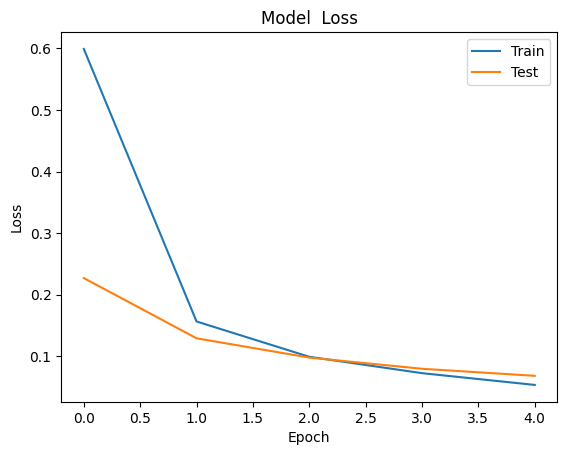

In [2]:
plt.plot(np.arange(0,5),losses)
plt.plot(np.arange(0,5),eval_losses)
plt.title('Model  Loss')
plt.xlabel('Epoch')        
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

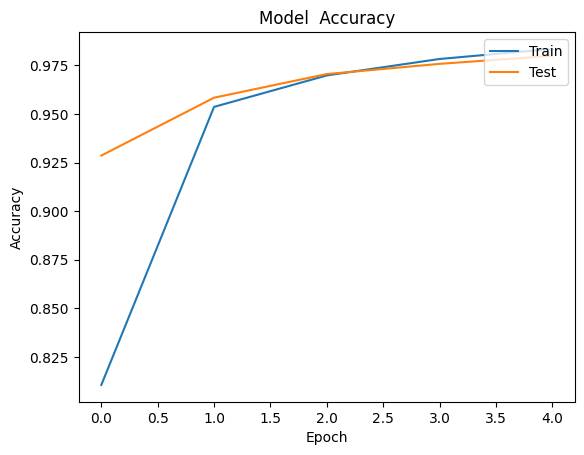

In [3]:
plt.plot(np.arange(0,5),acces)
plt.plot(np.arange(0,5),eval_acces)
plt.title('Model  Accuracy')
plt.xlabel('Epoch')        
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Save Model

In [4]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)

# define cost
criterion = nn.CrossEntropyLoss()

# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))

losses = []
acces = []
eval_losses = []
eval_acces = []



for epoch in range(5):
    train_loss = 0
    train_acc = 0
    model.train()       
    for im, label in train_data:
        
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        
        loss = criterion(pred, label)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        

        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    

    eval_loss = 0
    eval_acc = 0
    model.eval()
    
    for im, label in test_data:

        im = im.to(device)
        label = label.to(device)
        
        pred = model(im)
        loss = criterion(pred, label)

        
        eval_loss += loss.item()

        
        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
    
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_data), train_acc / len(train_data), eval_loss / len(test_data), eval_acc / len(test_data)))

# save whole model   
torch.save(model, './models/dnn.pkl')

Using cpu device
epoch: 0, Train Loss: 0.590705, Train Acc: 0.825893, Eval Loss: 0.215192, Eval Acc: 0.932951
epoch: 1, Train Loss: 0.157539, Train Acc: 0.953108, Eval Loss: 0.115784, Eval Acc: 0.964794
epoch: 2, Train Loss: 0.101041, Train Acc: 0.969416, Eval Loss: 0.091712, Eval Acc: 0.971816
epoch: 3, Train Loss: 0.074585, Train Acc: 0.977279, Eval Loss: 0.092830, Eval Acc: 0.970332
epoch: 4, Train Loss: 0.056509, Train Acc: 0.983292, Eval Loss: 0.079341, Eval Acc: 0.975672


In [5]:
# load whole model
load_model = torch.load('./models/dnn.pkl')
print(load_model)
load_model.eval()
eval_loss = 0
for im, label in test_data:
    im = im.to(device)
    label = label.to(device)
        
    pred = load_model(im)
    loss = criterion(pred, label)
    eval_loss += loss.item()
print(eval_loss / len(test_data))

DNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=125, bias=True)
  (fc4): Linear(in_features=125, out_features=10, bias=True)
)
0.0793410670306958


In [6]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)

# define cost
criterion = nn.CrossEntropyLoss()

# optimization
optimizer = torch.optim.SGD(model.parameters(), 0.1)
#optimizer = torch.optim.RMSprop(model.parameters(), 0.01, alpha=0.9)
#optimizer = torch.optim.Adam(model.parameters(), 0.01, betas=(0.9, 0.99))

losses = []
acces = []
eval_losses = []
eval_acces = []



for epoch in range(5):
    train_loss = 0
    train_acc = 0
    model.train()       
    
    for im, label in train_data:
        
        im = im.to(device)
        label = label.to(device)
        pred = model(im)
        
        loss = criterion(pred, label)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        

        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    

    eval_loss = 0
    eval_acc = 0
    model.eval()
    
    for im, label in test_data:

        im = im.to(device)
        label = label.to(device)
        
        pred = model(im)
        loss = criterion(pred, label)

        
        eval_loss += loss.item()

        
        _, pred = pred.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
    
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_data), train_acc / len(train_data), eval_loss / len(test_data), eval_acc / len(test_data)))


# save model weights
torch.save(model.state_dict(),'dnn.pth')

Using cpu device
epoch: 0, Train Loss: 0.585301, Train Acc: 0.819363, Eval Loss: 0.247546, Eval Acc: 0.925435
epoch: 1, Train Loss: 0.153465, Train Acc: 0.954674, Eval Loss: 0.154365, Eval Acc: 0.952532
epoch: 2, Train Loss: 0.099252, Train Acc: 0.970149, Eval Loss: 0.086696, Eval Acc: 0.972706
epoch: 3, Train Loss: 0.072939, Train Acc: 0.978095, Eval Loss: 0.094135, Eval Acc: 0.969937
epoch: 4, Train Loss: 0.055436, Train Acc: 0.982926, Eval Loss: 0.074035, Eval Acc: 0.977255


In [7]:
load_model = DNN().to(device)
load_model.load_state_dict(torch.load('dnn.pth')) # it takes the loaded dictionary, not the path file itself

print(load_model)
load_model.eval()
eval_loss = 0
for im, label in test_data:
    im = im.to(device)
    label = label.to(device)
        
    pred = load_model(im)
    loss = criterion(pred, label)
    eval_loss += loss.item()
print(eval_loss / len(test_data))

DNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=125, bias=True)
  (fc4): Linear(in_features=125, out_features=10, bias=True)
)
0.07403546242747762
